LABORATORIO 2 - Procesamiento digital de señales
Hineill David Céspedes Espinoza
20213704

Implementar y dibujar las siguientes se˜nales de prueba. Considerar un l´ımite de
-100 a 100 para el eje X en sus gr´aficos.
x1[n] = cos( π
40n), n ∈ [−200, 199]
x2[n] = cos( π
50n), n ∈ [−200, 199]
Usando estas 2 se˜nales valide experimentalmente la linearidad y la propiedad de
invarianza en el tiempo para los siguientes sistemas. Teniendo en cuenta que para el
an´alisis de linearidad deber´a usar a1=a2=1 como pesos para las se˜nales de entrada y
un retardo en el tiempo k=20 para el an´alisis de la invarianza en el tiempo. Deber´a
implementar el c´odigo requerido para probar y mostrar gr´aficamente este an´alisis.

Sistema 1 (Tarea as´ıncrona) :
y[n] = T1{x[n]} = x[n+10]+x[n−10]
2
Sistema 2 (1pto.):
y[n] = T2{x[n]} = n.x[n]
Sistema 3 (1pto.):
y[n] = T3{x[n]} = n.x2[n]

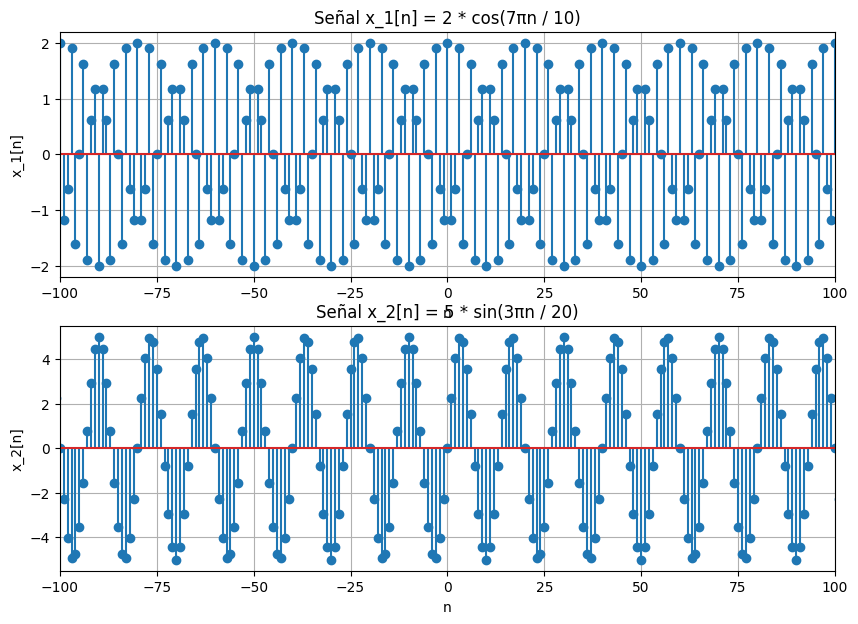

In [30]:
#Para el primer Sistema
#Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt

#Primero generamos las señales solicitadas y las gráficamos
n = np.arange(-200,199)
x_1 = 2*np.cos((7*np.pi/10) * (n) ) #LAS USAREMOS DE PRUEBA EN PREGUNTA 2
x_2 = 5* np.sin( ( 3*np.pi/20 ) * n)
indices= n
plt.figure(figsize=(10, 7))

# Gráfico para x_1
plt.subplot(2, 1, 1)
plt.stem(n, x_1)
plt.title('Señal x_1[n] = 2 * cos(7πn / 10)')
plt.xlim([-100,100])
plt.xlabel('n')
plt.ylabel('x_1[n]')
plt.grid(True)

# Gráfico para x_2
plt.subplot(2, 1, 2) 
plt.stem(n, x_2)
plt.title('Señal x_2[n] = 5 * sin(3πn / 20)')
plt.xlabel('n')
plt.xlim([-100,100])
plt.ylabel('x_2[n]')
plt.grid(True)
plt.show()


In [31]:
#Definimos parámetros para probar la linealidad del sistema 
a2 = 1
a1 = 1
k = 20 #Delay

SEGUNDO SISTEMA

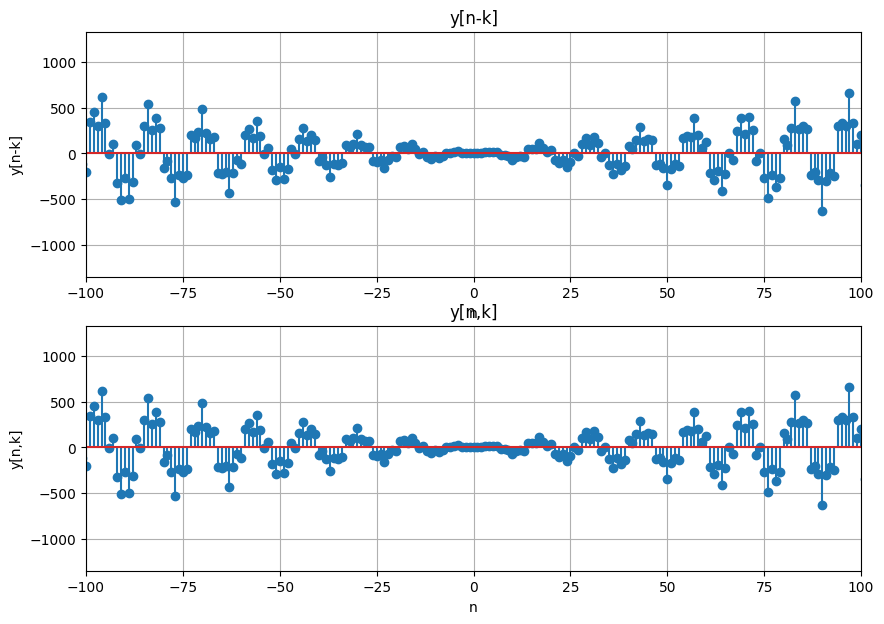

error promedio caso lineal : 9.223339464621875e-13


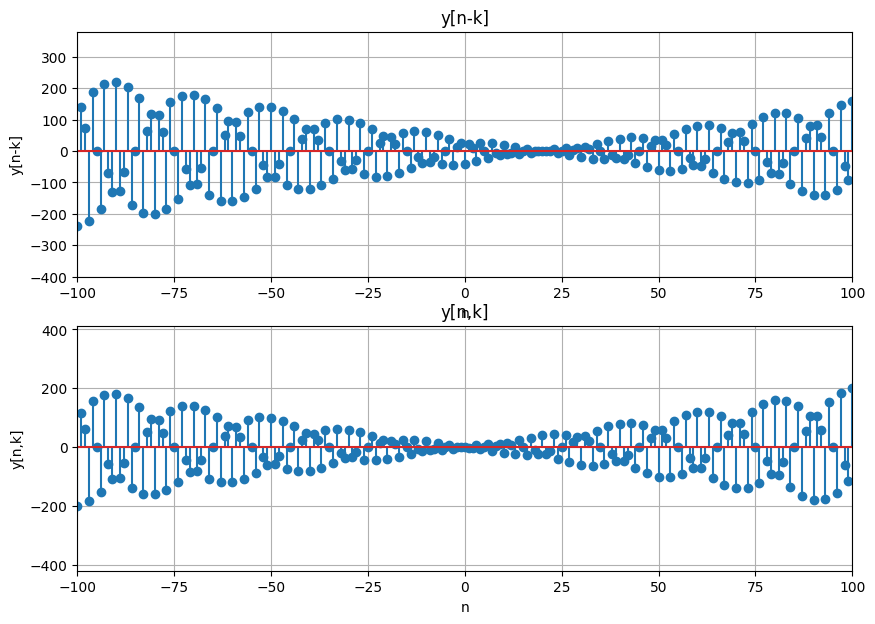

error promedio caso invarianza 565.1966149894209


In [44]:
#Para el segundo Sistema
def sistema2(input, indices):
    salida = []
    for i   in np.arange(len(indices)):
        salida.append(indices[i] * input[i])
    return np.asarray(salida)

#Demostramos linealidad
#dado un T { a1* x_1  +  a2*x_2} = a1* T{x_1} +  a2*T{x_2}
term_1 =  sistema2(a1*x_1 + a2*x_2 , indices)
term_2 =  a1 * sistema2(x_1, indices) +a2 * sistema2(x_2 , indices)
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.stem(indices, term_1)
plt.title('y[n-k]')
plt.xlim([-100,100])
plt.ylim([np.min(term_1),np.max(term_1)])
plt.xlabel('n')
plt.ylabel('y[n-k]')
plt.grid(True)

plt.subplot(2, 1, 2) 
plt.stem(indices, term_2)
plt.title('y[n,k]')
plt.ylim([np.min(term_2),np.max(term_2)])
plt.xlabel('n')
plt.xlim([-100,100])
plt.ylabel('y[n,k]')
plt.grid(True)
plt.show()
print(f"error promedio caso lineal : {np.linalg.norm(term_1-term_2)}")
#Demostramos invarianza en el tiempo 
#y[n-k] = y [n,k] -> es TI

#Aplicamos retraso en el tiempo a la entrada para term2
indices_prueba_2 =  indices #Hacemos una copia 
def retraso_signal(signal , indices, delay):
    signal_delay = np.roll(np.pad(signal,(delay,delay), mode="constant" ,constant_values=0) ,  delay ) 
    idx= np.arange(np.min(indices) - delay ,  np.max(indices) + delay+1)
    return [signal_delay , idx]

term_1 = retraso_signal(sistema2(x_1,indices_prueba_2),indices, k )[0]
term_1_idx = retraso_signal(sistema2(x_1,indices_prueba_2),indices, k )[1]

indices_prueba_2_2 =  indices #Hacemos una copia 

term_2 = sistema2(retraso_signal(x_1, indices_prueba_2_2, k)[0],retraso_signal(x_1, indices_prueba_2_2, k)[1])

term_2_idx = retraso_signal(x_1, indices_prueba_2_2, k)[1]
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('y[n-k]')
plt.xlim([-100,100])
plt.ylim([np.min(term_1),np.max(term_1)])
plt.xlabel('n')
plt.ylabel('y[n-k]')
plt.grid(True)

plt.subplot(2, 1, 2) 
plt.stem(term_2_idx, term_2)
plt.title('y[n,k]')
plt.ylim([np.min(term_2),np.max(term_2)])
plt.xlabel('n')
plt.xlim([-100,100])
plt.ylabel('y[n,k]')
plt.grid(True)
plt.show()
print(f"error promedio caso invarianza {np.linalg.norm(term_1-term_2)}")


Sí es lineal pero no es TI

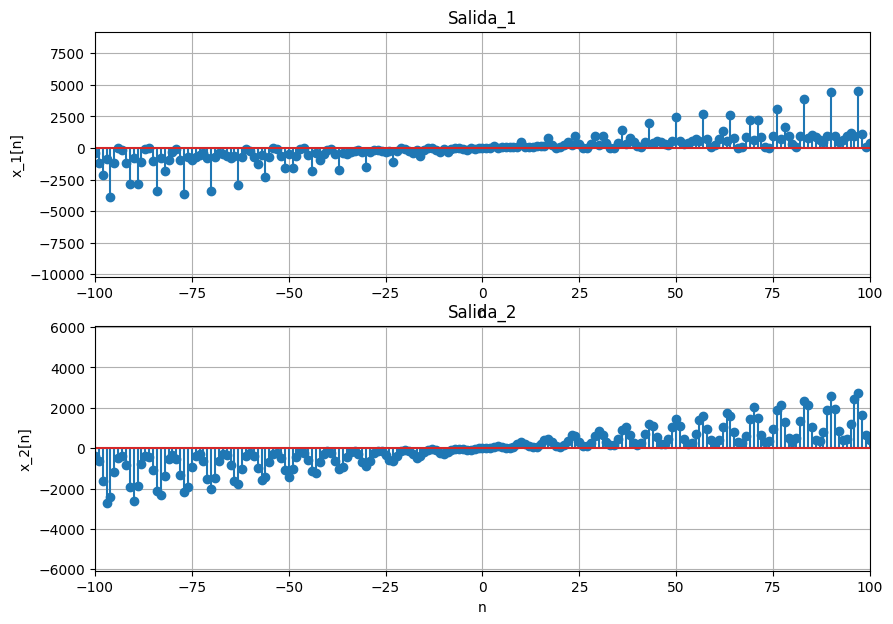

error promedio de linealidad : 23067.006362669596


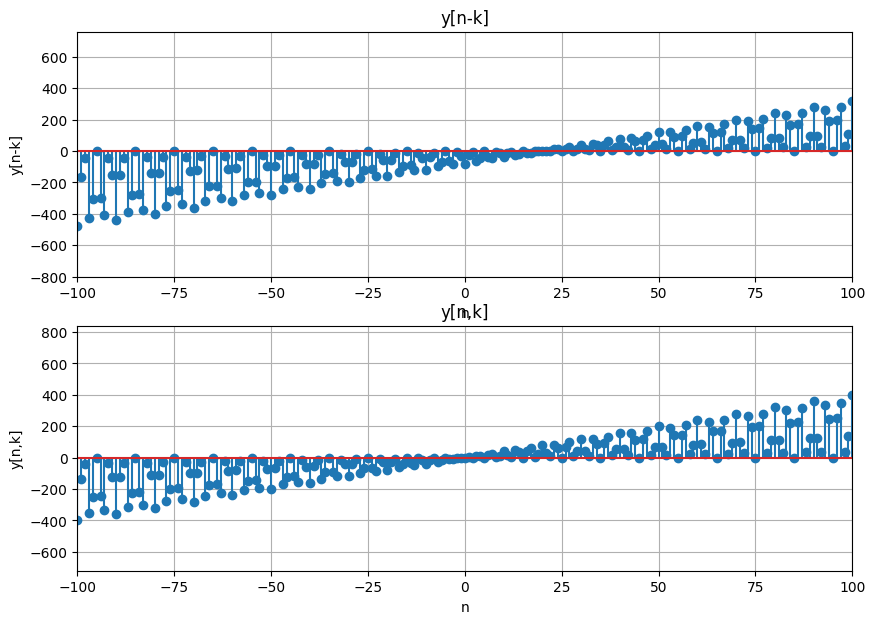

error promedio caso invarianza 979.405977099128


In [55]:
#Para el tercer sistema
n = np.arange(-200,199)
x_1 = 2*np.cos((7*np.pi/10) * (n) ) #LAS USAREMOS DE PRUEBA EN PREGUNTA 2
x_2 = 5* np.sin( ( 3*np.pi/20 ) * n)
indices= n

def sistema3(input, indices):
    salida = []
    for i   in np.arange(len(indices)):
        salida.append(indices[i] * (input[i])*(input[i]))
    return [np.asarray(salida), indices]

#DEMOSTRAMOS LINEALIDAD
#dado un T { a1* x_1  +  a2*x_2} = a1* T{x_1} +  a2*T{x_2}
term_1 = sistema3(a1*x_1 + a2*x_2 , indices)[0]
term_1_idx = sistema3(a1*x_1 + a2*x_2 , indices)[1]
term_2 = a1*sistema3(x_1, indices)[0] + a2*sistema3(x_2 , indices)[0]
term_2_idx = sistema3(x_1, indices)[1]

plt.figure(figsize=(10, 7))
# Gráfico para x_1
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('Salida_1')
plt.xlim([-100,100])
plt.xlabel('n')
plt.ylabel('x_1[n]')
plt.grid(True)

# Gráfico para x_2
plt.subplot(2, 1, 2) 
plt.stem(term_2_idx, term_2)
plt.title('Salida_2')
plt.xlabel('n')
plt.xlim([-100,100])
plt.ylabel('x_2[n]')
plt.grid(True)
plt.show()

print(f"error promedio de linealidad : {np.linalg.norm(term_1-term_2)}")
#Demostramos invarianza en el tiempo 
#y[n-k] = y [n,k] -> es TI

#Aplicamos retraso en el tiempo a la entrada para term2
indices_prueba_2 =  indices #Hacemos una copia 


term_1 = retraso_signal(sistema3(x_1,indices)[0],sistema3(x_1,indices)[1], k )[0]
term_1_idx = retraso_signal(sistema3(x_1,indices)[0],sistema3(x_1,indices)[1], k )[1]

indices_prueba_2_2 =  indices #Hacemos una copia 

term_2 = sistema3(retraso_signal(x_1, indices_prueba_2_2, k)[0],retraso_signal(x_1, indices_prueba_2_2, k)[1])[0]

term_2_idx = sistema3(retraso_signal(x_1, indices_prueba_2_2, k)[0],retraso_signal(x_1, indices_prueba_2_2, k)[1])[1]
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('y[n-k]')
plt.xlim([-100,100])
plt.ylim([np.min(term_1),np.max(term_1)])
plt.xlabel('n')
plt.ylabel('y[n-k]')
plt.grid(True)

plt.subplot(2, 1, 2) 
plt.stem(term_2_idx, term_2)
plt.title('y[n,k]')
plt.ylim([np.min(term_2),np.max(term_2)])
plt.xlabel('n')
plt.xlim([-100,100])
plt.ylabel('y[n,k]')
plt.grid(True)
plt.show()
print(f"error promedio caso invarianza {np.linalg.norm(term_1-term_2)}")




No es lineal ni invariante en el tiempo 

PREGUNTA 2
Imagine que se tiene los siguientes sistemas:
Sistema 1 (H[n]):
y1[n] = 10x[n] + 0.25x[n − 1] + 0.5y1[n − 1]
Sistema 2 (G[n]):
y2[n] = x[n] − 0.2x[n − 1] + 0.1x[n − 2] + 0.8y2[n − 1] − 0.6y2[n − 2]
Donde y[n] son las se˜nales de salida de los sistemas 1 y 2 respectivamente

a) (1pto.) Implemente un c´odigo para obtener la respuesta al impulso de G[n] y
graf´ıquelo empleando N=50 muestras.

In [1]:
#Importamos librerías
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Hineill\AppData\Local\Temp\ipykernel_30408\3834352999.py:19: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y_n, use_line_collection=True)


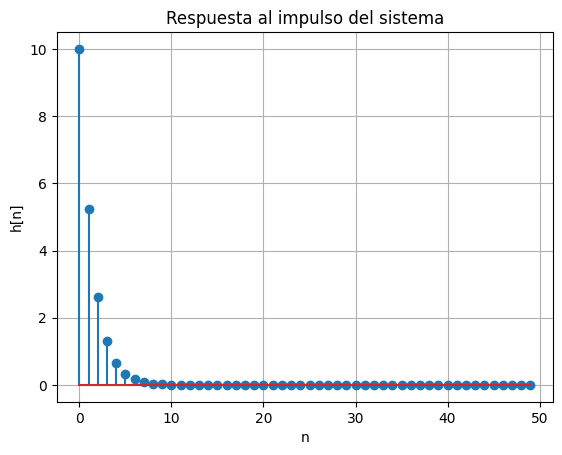

In [56]:
#ASINCRONO
#Como se menciona que el sistema está inicialmente en reposo  
#y[-1] = 0
N= 50 #Número de samples
#Para simular la respuesta al impulso 
#Asumiremos un x_n = dirac(n)
x_n = np.zeros(N)
x_n[0]= 1
#Ahora metemos todo al bucle para barrer los valores de y_n
#y[0] = 10x[0] + 0.25*x[-1] + 0.5y[-1]
#
y_n = np.zeros(N)
for i  in range(N): 
    if (i==0) :
        y_n[i]= 10*x_n[i] 
    else:
        y_n[i]= 10*x_n[i] + 0.25*x_n[i-1] + 0.5*y_n[i-1]
# Graficar y_n
plt.stem(y_n, use_line_collection=True)
plt.title('Respuesta al impulso del sistema')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid(True)
plt.show()
h_n=y_n #Respuesta al impulso

C:\Users\Hineill\AppData\Local\Temp\ipykernel_30408\2689529219.py:17: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y_n_2, use_line_collection=True)


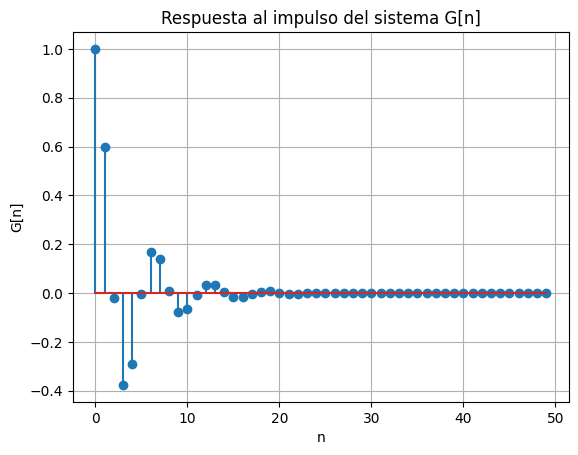

In [57]:
#Como se menciona que el sistema está inicialmente en reposo  
#y[0] = 0
N= 50 #Número de samples
#Para simular la respuesta al impulso 
#Asumiremos un x_n = dirac(n)
#y[-1]= 0 por el reposo
x_n = np.zeros(N)
x_n[0]= 1
#Ahora metemos todo al bucle para barrer los valores de y_n
y_n_2 = np.zeros(N)
for i  in range(N): 
    if (i==0) :
        y_n_2[i]= x_n[i]
    else:
        y_n_2[i]= x_n[i] - 0.2*x_n[i-1] + 0.1*x_n[i-2]   + 0.8*y_n_2[i-1] -0.6 *y_n_2[i-2]
# Graficar y_n
plt.stem(y_n_2, use_line_collection=True)
plt.title('Respuesta al impulso del sistema G[n]')
plt.xlabel('n')
plt.ylabel('G[n]')
plt.grid(True)
plt.show()
g_n=y_n_2

b) (1pto.)Implemente un c´odigo para demostrar la linearidad e invarianza en el
tiempo de H[n].

In [77]:
#Probar linealidad de sistema H[n]

#Parametros para probar linealidad 
#dado un T { a1* x_1  +  a2*x_2} = a1* T{x_1} +  a2*T{x_2}
a1=2
a2=2


n = np.arange(-200,200)
x_1 = 2*np.cos((7*np.pi/10) * (n) )

def sistema_H(input, indices):
    y_n = np.zeros(len(indices))
    for i  in range(len(indices)+1): 
        if (i==0) :
            y_n[i]= 10*input[i] 
        else:
            y_n[i]= 10*input[i] + 0.25*input[i-1] + 0.5*y_n[i-1]
    return y_n , np.arange(np.min(indices) , np.max(indices) + 1)

term_1 = sistema_H(a1*x_1 + a2*x_2,n)[0]
term_1_idx = sistema_H(a1*x_1 + a2*x_2,n)[1]
term_2 = a1*sistema_H(x_1, n)[0] + a2*sistema_H(x_2 , n)[0]
term_2_idx = sistema_H(x_1, n)[1]


plt.figure(figsize=(10, 7))
# Gráfico para x_1
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('y[n-k]')
plt.xlim([-100,100])
plt.xlabel('n')
plt.ylabel('y[n-k]')
plt.grid(True)

# Gráfico para x_2
plt.subplot(2, 1, 2) 
plt.stem(term_2_idx, term_2)
plt.title('y[n,k]')
plt.xlabel('n')
plt.xlim([-100,100])
plt.ylabel('y[n,k]')
plt.grid(True)
plt.show()

print(f"El error promedio es de : {np.linalg.norm(term_1-term_2)}")

#Parametros para demostrar invarianza
def retraso_signal(signal , idxs, delay):
    signal_delay = np.roll(np.pad(signal,(delay,delay), mode="constant" ,constant_values=0) ,  delay ) 
    idx= np.arange(np.min(idxs) - delay ,  np.max(idxs)+1)
    return [signal_delay , idx]
#Demostramos invarianza en el tiempo 
#y[n-k] = y [n,k] -> es TI



term_1 = retraso_signal(sistema_H(x_1,indices)[0] ,  sistema_H(x_1,indices)[0] , k)[0]
term_1_idx = retraso_signal(sistema_H(x_1,indices)[0] ,  sistema_H(x_1,indices)[0] , k)[1]
print(term_1_idx)
term_2 = sistema_H(retraso_signal(x_1 , indices, k)[0], retraso_signal(x_1 , indices, k)[1] )[0]
term_2_idx = sistema_H(retraso_signal(x_1 , indices, k)[0], retraso_signal(x_1 , indices, k)[1] )[1]

plt.figure(figsize=(10, 7))
# Gráfico para x_1
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('y[n-k]')
plt.xlim([-100,100])
plt.xlabel('n')
plt.ylabel('y[n-k]')
plt.grid(True)

# Gráfico para x_2
plt.subplot(2, 1, 2) 
plt.stem(term_2_idx, term_2)
plt.title('y[n,k]')
plt.xlabel('n')
plt.xlim([-100,100])
plt.ylabel('y[n,k]')
plt.grid(True)
plt.show()
print(f"El error promedio de invarianza es de : {np.linalg.norm(term_1-term_2)}")



ValueError: operands could not be broadcast together with shapes (400,) (399,) 

c) (1pto.)Implemente el c´odigo para demostrar la linearidad e invarianza en el tiempo
de G[n].

d)(1pto.) Implemente un programa para calcular la respuesta al impulso del siguiente
sistema (H[n] * G[n]) y graf´ıquelo usando N=50 muestras.

e) (1pto.)Implemente el c´odigo para demostrar la linearidad e invarianza en el tiempo
de H[n] * G[n].

PREGUNTA 3

Teniendo en cuenta que la correlaci´on de dos se˜nales discretas est´a representada
como:
rxy[n] =
P∞
k=−∞ x[k]y[k − n]
Cree las siguientes se˜nales usando N=16000 muestras.
x1[n] = sin(2.π. 147
16000.n) + sin(2.π. 294
16000.n)
x2[n] = sin(2.π. 131
16000.n) + sin(2.π. 262
16000.n)

a) (1pto.) Aplique la correlaci´on de cada se˜nal x1[n] y x2[n] contra la se˜nal de audio
(chord.wav, tomar como valores a partir de t=1.1s) usando convoluci´on. Luego
obtenga el valor m´aximo y mu´estrelo.

b)(1pto.) Acorde a los resultados obtenidos qu´e se˜nal es m´as similar al archivo de
audio. Recordar que a mayor valor de correlaci´on m´as similaridad se obtiene.

c)(1pto.) Realice la convoluci´on de ambas se˜nales X1 y X2 usando FFT. Luego
muestre si esta se˜nal obtenida tiene mayor similitud con la se˜nal de audio.